In [0]:
import tensorflow as tf
tf.__version__
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [0]:
print(len(x_train), len(y_train), len(x_test), len(y_test))
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

60000 60000 10000 10000


In [0]:
import numpy as np
print(len(x_train),len(y_train))

60000 60000


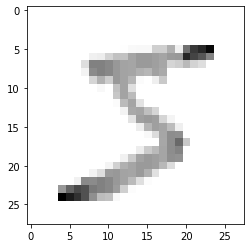

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [0]:
# Epoch vs Accuracy
num_train = 1000
num_val = 5000
acc_list = []
ep = 20
num_layers = 3
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
for i in range(num_layers-1):
  model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

history = model.fit(x_train[0:num_train], y_train[0:num_train], validation_data = (x_test[:num_val], y_test[:num_val]), epochs = ep)
acc = history.history["val_acc"]


Train on 1000 samples, validate on 5000 samples
Epoch 1/20
1000/1000 [==============================] - 4s 4ms/sample - loss: 1.8745 - acc: 0.5220 - val_loss: 1.3896 - val_acc: 0.6742
Epoch 2/20
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.7911 - acc: 0.8240 - val_loss: 0.8043 - val_acc: 0.7538
Epoch 3/20
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4466 - acc: 0.8780 - val_loss: 0.6494 - val_acc: 0.7988
Epoch 4/20
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3016 - acc: 0.9260 - val_loss: 0.5800 - val_acc: 0.8238
Epoch 5/20
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.2331 - acc: 0.9440 - val_loss: 0.5650 - val_acc: 0.8246
Epoch 6/20
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.1809 - acc: 0.9620 - val_loss: 0.5696 - val_acc: 0.8216
Epoch 7/20
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.1402 - acc: 0.9660 - val_loss: 0.5065 - val_acc: 0.8460


[0.6742, 0.7538, 0.7988, 0.8238, 0.8246, 0.8216, 0.846, 0.8512, 0.8466, 0.8432, 0.8396, 0.8474, 0.8494, 0.8436, 0.8488, 0.8512, 0.8492, 0.8522, 0.8502, 0.8506]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


Text(0.5, 1.0, 'Num iterations vs Accuracy')

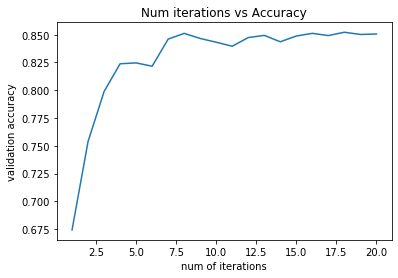

In [0]:
print(acc)
print(list(range(1,ep+1)))
plt.plot(list(range(1,ep+1)), acc)
plt.xlabel("num of iterations")
plt.ylabel("validation accuracy")
plt.title("Num iterations vs Accuracy")

In [0]:
# Num Training data vs Accuracy
l = len(x_train)
num_val = 5000
start = 10
num_train = []
while start < l:
  num_train.append(start)
  start *= 1.5
  start = int(start)
print(num_train)
acc_list = []
for n in num_train:
  num_layers = 3
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten())
  for i in range(num_layers-1):
    model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
  model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))
  model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

  history = model.fit(x_train[0:n], y_train[0:n], validation_data = (x_test[:num_val], y_test[:num_val]), epochs = 1)
  acc_list.append(history.history["val_acc"][-1])

[10, 15, 22, 33, 49, 73, 109, 163, 244, 366, 549, 823, 1234, 1851, 2776, 4164, 6246, 9369, 14053, 21079, 31618, 47427]
Train on 10 samples, validate on 5000 samples
10/10 [==============================] - 3s 255ms/sample - loss: 2.3255 - acc: 0.0000e+00 - val_loss: 2.3070 - val_acc: 0.0812
Train on 15 samples, validate on 5000 samples
15/15 [==============================] - 3s 175ms/sample - loss: 2.3317 - acc: 0.0667 - val_loss: 2.3043 - val_acc: 0.1162
Train on 22 samples, validate on 5000 samples
22/22 [==============================] - 3s 122ms/sample - loss: 2.2983 - acc: 0.0909 - val_loss: 2.2858 - val_acc: 0.1836
Train on 33 samples, validate on 5000 samples
33/33 [==============================] - 3s 86ms/sample - loss: 2.3032 - acc: 0.1515 - val_loss: 2.2722 - val_acc: 0.1570
Train on 49 samples, validate on 5000 samples
49/49 [==============================] - 3s 57ms/sample - loss: 2.3088 - acc: 0.1429 - val_loss: 2.2772 - val_acc: 0.1422
Train on 73 samples, validate on 5

[0.0812, 0.1162, 0.1836, 0.157, 0.1422, 0.2112, 0.3152, 0.3644, 0.4272, 0.5086, 0.6006, 0.625, 0.7272, 0.7784, 0.8142, 0.8378, 0.8562, 0.8852, 0.8992, 0.9134, 0.93, 0.9416]


Text(0.5, 1.0, 'Num Training vs Accuracy')

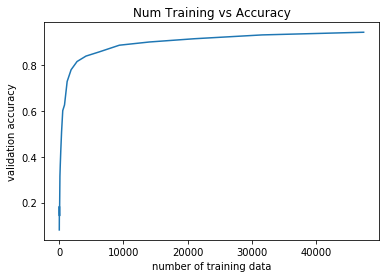

In [0]:
print(acc_list)
plt.plot(num_train, acc_list)
plt.xlabel("number of training data")
plt.ylabel("validation accuracy")
plt.title("Num Training vs Accuracy")

In [0]:
# Num layers vs Accuracy
num_val = 5000
num_train = 3000
acc_list = []
num_layers = [i for i in range(1,11)]
for num in num_layers:
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten())
  for i in range(num-1):
    model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
  model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))
  model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

  history = model.fit(x_train[0:num_train], y_train[0:num_train], validation_data = (x_test[:num_val], y_test[:num_val]), epochs = 1)
  acc_list.append(history.history["val_acc"][-1])

Train on 3000 samples, validate on 5000 samples
3000/3000 [==============================] - 5s 2ms/sample - loss: 1.7588 - acc: 0.6540 - val_loss: 1.4699 - val_acc: 0.7434
Train on 3000 samples, validate on 5000 samples
3000/3000 [==============================] - 5s 2ms/sample - loss: 1.8099 - acc: 0.6090 - val_loss: 1.5086 - val_acc: 0.7060
Train on 3000 samples, validate on 5000 samples
3000/3000 [==============================] - 6s 2ms/sample - loss: 1.1090 - acc: 0.7397 - val_loss: 0.7045 - val_acc: 0.8018
Train on 3000 samples, validate on 5000 samples
3000/3000 [==============================] - 6s 2ms/sample - loss: 1.0602 - acc: 0.7097 - val_loss: 0.5774 - val_acc: 0.8336
Train on 3000 samples, validate on 5000 samples
3000/3000 [==============================] - 6s 2ms/sample - loss: 1.0249 - acc: 0.7053 - val_loss: 0.5879 - val_acc: 0.8318
Train on 3000 samples, validate on 5000 samples
3000/3000 [==============================] - 6s 2ms/sample - loss: 1.0613 - acc: 0.6717

[0.7434, 0.706, 0.8018, 0.8336, 0.8318, 0.8302, 0.8128, 0.814, 0.795, 0.7264, 0.694]


Text(0.5, 1.0, 'Num layers vs Accuracy')

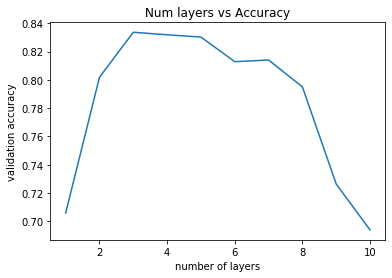

In [0]:
print(acc_list)
plt.plot(num_layers[1:], acc_list[1:])
plt.xlabel("number of layers")
plt.ylabel("validation accuracy")
plt.title("Num layers vs Accuracy")